In [1]:
from platform import python_version

print(python_version())

3.8.11


In [3]:
import monai
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchmetrics

In [20]:
def viz(data):
    plt.imshow(data, vmax=1.0, vmin=0.0, cmap='gray')

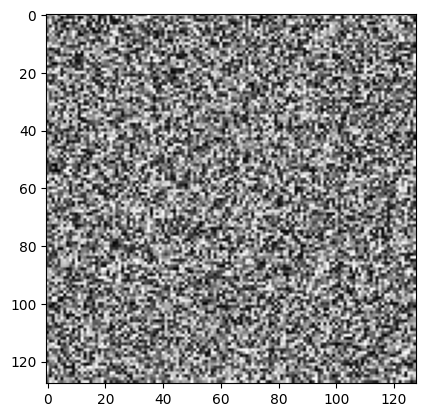

In [27]:
# make some random data

dataset = np.random.rand(100,1,128,128)
viz(dataset[0][0])
plt.show()

In [34]:
from monai.networks.nets import VarAutoEncoder
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = VarAutoEncoder(
        dimensions=2,
        in_shape=(1,128,128),
        out_channels=1,
        latent_size=2,
        channels=(16, 32, 64),
        strides=(1, 2, 2),
    ).to(device)

In [35]:
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

In [40]:
train_tensor = torch.Tensor(dataset).to(device)

In [41]:
train_tensor.size()

torch.Size([100, 1, 128, 128])

In [42]:
train_tensor.dtype

torch.float32

In [43]:
writer.add_graph(model, train_tensor)

In [46]:
import os
os.getcwd()

'/home/nick/dev/AnatomicRecon-POCUS-AI/VAE'